In [17]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
import xarray as xr
import numpy as np
import cmocean
import pandas as pd

In [18]:
dataset = (r'/Users/chiaraciscato/Desktop/geomar/FOCI data/CO2flux_CDR_EU_coast_ssp126_1m.nc')
data = xr.open_dataset(dataset)

In [19]:
lats = data.variables['nav_lat'][:]
lons = data.variables['nav_lon'][:]
time = data.variables['time_counter'][:]
co2flux = data.variables['co2flux_cpl'][:].squeeze()
print(co2flux.shape)

(1020, 511, 722)


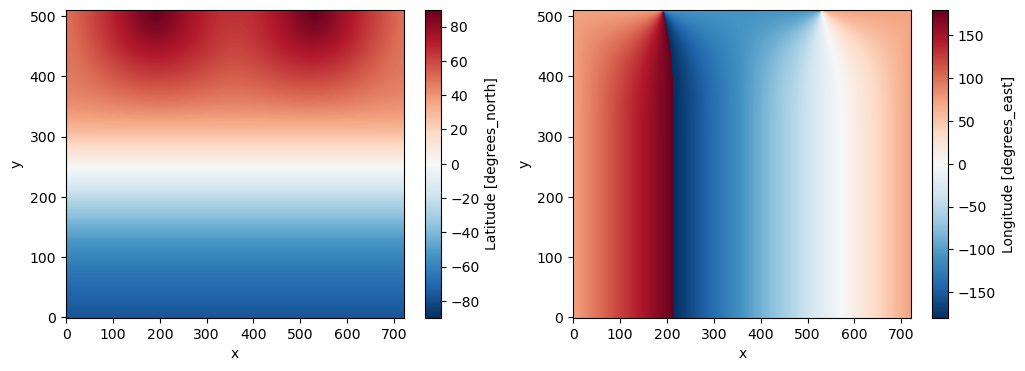

In [20]:
# plot coordinates

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
data.nav_lat.plot(ax=ax1)
data.nav_lon.plot(ax=ax2)

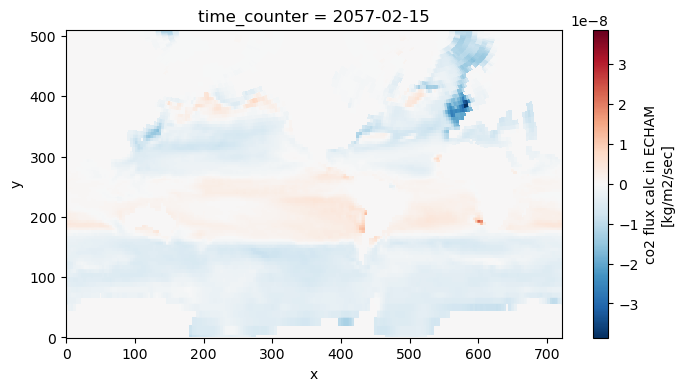

In [6]:
# plot world map at time point [x]

data.co2flux_cpl[505].plot(figsize = (8, 4))

# in alternative
# plt.figure(figsize = (10, 6))
# data.co2flux_cpl[1010].plot()

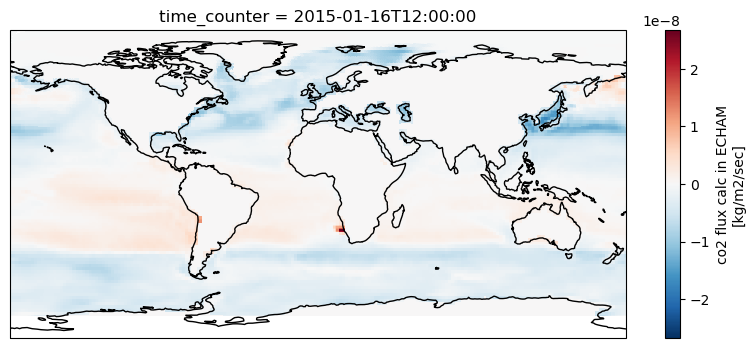

In [7]:
plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
data.co2flux_cpl[0].plot.pcolormesh(
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", add_colorbar=True
)
ax.coastlines()
ax.set_global()

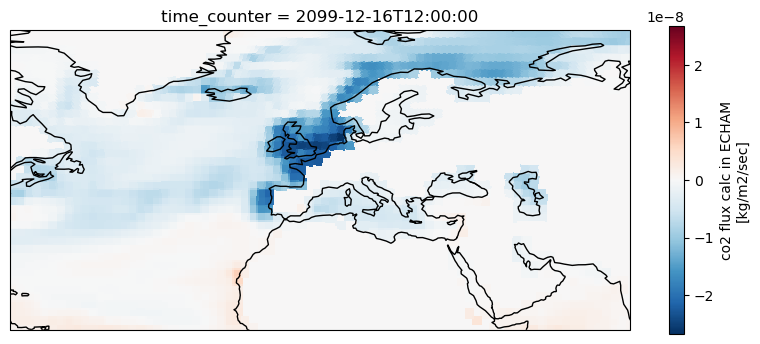

In [8]:
# visualise the data with cartopy

plt.figure(figsize=(10, 4))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
data.co2flux_cpl[1019].plot.pcolormesh( # [] to select a month
    ax=ax, transform=ccrs.PlateCarree(), x="nav_lon", y="nav_lat", 
    add_colorbar=True
)
ax.coastlines()
ax.set_extent([75, -70, 10, 60]) # plot a region

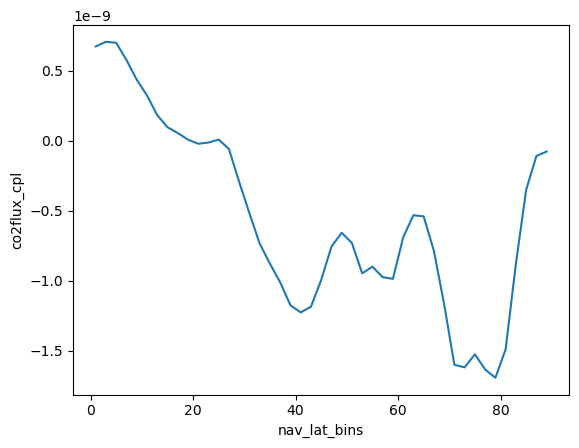

In [9]:
# calculate the mean CO2 flux at each latitude

lat_bins = np.arange(0, 91, 2) # define two-degree wide latitude bins

lat_center = np.arange(1, 90, 2) # define a label for each bin corresponding to the central latitude

CO2flux_mean = data.co2flux_cpl.groupby_bins("nav_lat", lat_bins, labels=lat_center).mean(
    dim=xr.ALL_DIMS
) # group according to those bins and take the mean

CO2flux_mean.plot()

# https://docs.xarray.dev/en/stable/examples/multidimensional-coords.html 

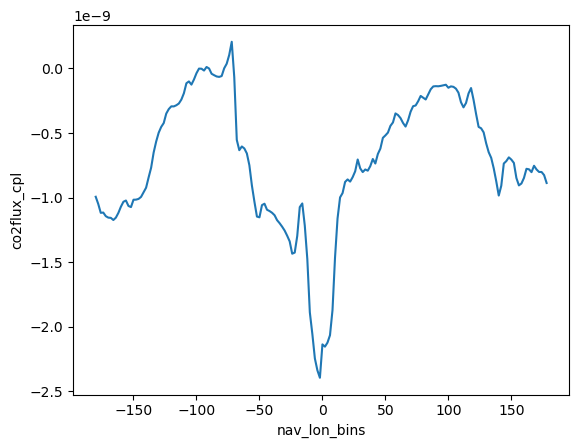

In [10]:
# calculate the mean CO2 flux at each longitude

lon_bins = np.arange(-181, 181, 2) # define two-degree wide latitude bins

lon_center = np.arange(-180, 180, 2) # define a label for each bin corresponding to the central latitude

CO2flux_mean = data.co2flux_cpl.groupby_bins("nav_lon", lon_bins, labels=lon_center).mean(
    dim=xr.ALL_DIMS
) # group according to those bins and take the mean

CO2flux_mean.plot()

# https://docs.xarray.dev/en/stable/examples/multidimensional-coords.html 

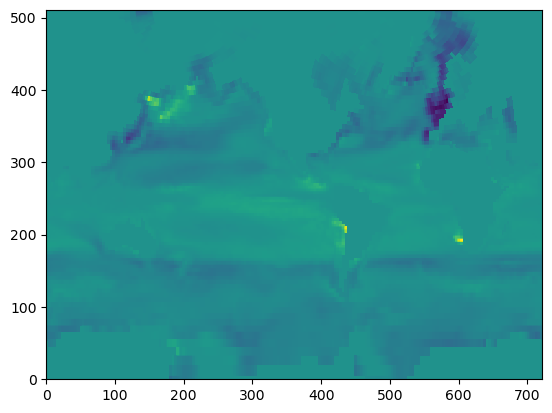

In [29]:
# plot data at time 0

plt.figure()
plt.pcolor(co2flux[1019,:,:])

In [30]:
ds_date_range = data.sel(time_counter=slice('2089', '2099')) # select a time range

In [31]:
df = ds_date_range.to_dataframe() # export data as Pandas dataframe 

In [32]:
df.head() # first lines of new dataframe

co2flux_cpl    nav_lat  nav_lon  \
time_counter        y x bnds                                    
2089-01-16 12:00:00 0 0 0             0.0 -77.010475    72.75   
                        1             0.0 -77.010475    72.75   
                      1 0             0.0 -77.010475    73.25   
                        1             0.0 -77.010475    73.25   
                      2 0             0.0 -77.010475    73.75   

                             time_counter_bnds  
time_counter        y x bnds                    
2089-01-16 12:00:00 0 0 0           2089-01-01  
                        1           2089-02-01  
                      1 0           2089-01-01  
                        1           2089-02-01  
                      2 0           2089-01-01

In [33]:
df.describe() # describe the data 

,co2flux_cpl,nav_lat,nav_lon
count,9.740069e+07,9.740069e+07,9.740069e+07
mean,-4.211371e-10,5.172920e-01,-1.020401e+00
std,2.472236e-09,5.207631e+01,1.025694e+02
min,-5.436534e-08,-7.701048e+01,-1.799970e+02
25%,-1.195158e-09,-5.194667e+01,-9.518312e+01
50%,0.000000e+00,2.998630e+00,2.482575e+00
75%,2.436885e-10,5.047917e+01,8.425000e+01
max,5.325037e-08,8.988536e+01,1.799988e+02


In [34]:
ds_date_range.co2flux_cpl.mean(dim=('y', 'x')) # time_counter as x months for the selected timeframe

<xarray.DataArray 'co2flux_cpl' (time_counter: 132)>
array([-1.20888995e-09, -1.04184660e-09, -8.53676002e-10, -5.79327794e-10,
       -4.50941929e-10, -1.53538843e-10,  2.79802137e-10,  4.04876970e-10,
        4.19267497e-10, -3.38945224e-11, -7.08870337e-10, -1.22115764e-09,
       -1.20204023e-09, -1.05842319e-09, -9.49695983e-10, -6.16181521e-10,
       -3.99297866e-10, -5.59252340e-11,  1.74169097e-10,  4.03052474e-10,
        4.08555372e-10, -5.81264085e-12, -7.19639676e-10, -1.18411759e-09,
       -1.21201314e-09, -1.11981546e-09, -9.78410335e-10, -5.80077699e-10,
       -3.95247300e-10, -7.44401873e-11,  2.22772106e-10,  3.30723708e-10,
        1.90318092e-10, -1.23392516e-10, -7.63268681e-10, -1.24466258e-09,
       -1.20030516e-09, -1.23543133e-09, -1.01676987e-09, -7.03768014e-10,
       -4.66176170e-10, -2.04565260e-10,  1.81097704e-10,  3.08395012e-10,
        4.41167884e-10,  6.81324831e-11, -6.73294972e-10, -1.09554990e-09,
       -1.18811192e-09, -1.18381193e-09, -9.20807096e-10, -7.07030145e-10,
       -3.41613041e-10, -2.18811464e-11,  3.38968225e-10,  4.81657353e-10,
        4.24340991e-10, -8.24153441e-12, -7.29447588e-10, -1.18499395e-09,
       -1.17472303e-09, -1.07197523e-09, -8.98258969e-10, -5.86253975e-10,
       -3.60163435e-10,  2.98768456e-11,  3.12249412e-10,  3.57298302e-10,
        3.07020978e-10,  4.43752109e-11, -5.61135602e-10, -1.08877559e-09,
       -1.09112439e-09, -1.00527594e-09, -7.93776782e-10, -5.26296817e-10,
       -2.60816757e-10, -8.65656900e-11,  3.15805385e-10,  4.92831287e-10,
        4.65244558e-10,  1.24341749e-11, -6.71159108e-10, -1.09427302e-09,
       -1.11231115e-09, -1.03918605e-09, -8.20049298e-10, -6.02982131e-10,
       -3.10246216e-10, -2.12211673e-11,  2.57231716e-10,  4.04928121e-10,
        4.35866934e-10, -3.28122391e-11, -6.99730249e-10, -1.11524755e-09,
       -1.14369411e-09, -1.06362148e-09, -8.51742702e-10, -5.77673779e-10,
       -3.77745869e-10, -9.13535473e-11,  8.86277797e-11,  3.34783412e-10,
        2.86896154e-10, -4.15156236e-11, -7.96246624e-10, -1.05542988e-09,
       -1.17280686e-09, -1.05917580e-09, -8.65148686e-10, -6.21500827e-10,
       -4.19510803e-10, -1.03072579e-10,  2.68099024e-10,  4.45771438e-10,
        3.96712881e-10, -2.68945147e-11, -6.94672755e-10, -1.14210669e-09,
       -1.11303895e-09, -1.10724202e-09, -9.26811088e-10, -6.42413977e-10,
       -3.99275492e-10, -9.61220200e-11,  2.13647489e-10,  4.39111575e-10,
        3.20759447e-10,  1.46674304e-11, -6.35984111e-10, -1.04606858e-09])
Coordinates:
  * time_counter  (time_counter) datetime64[ns] 2089-01-16T12:00:00 ... 2099-...

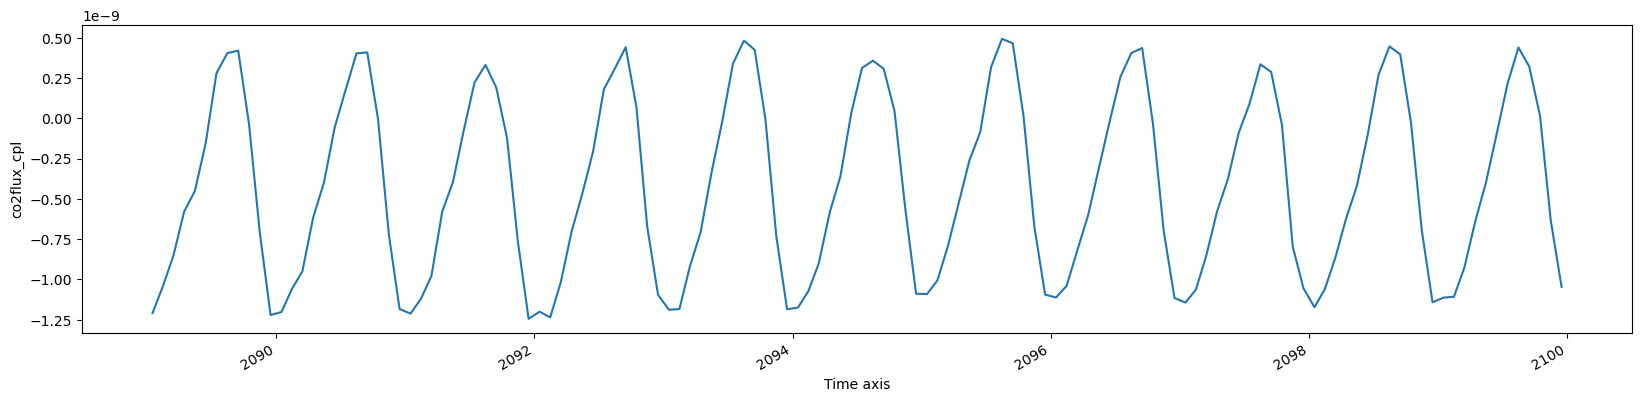

In [30]:
ds_date_range.co2flux_cpl.mean(dim=('y', 'x')).plot(figsize= (20, 4)) # global mean 

In [40]:
mean_array = ds_date_range.mean(dim='time_counter') # mean time
mean_array.values

<bound method Mapping.values of <xarray.Dataset>
Dimensions:      (y: 511, x: 722)
Coordinates:
    nav_lat      (y, x) float32 -77.01 -77.01 -77.01 -77.01 ... 50.07 50.0 50.0
    nav_lon      (y, x) float32 72.75 73.25 73.75 74.25 ... 73.01 73.0 73.0
Dimensions without coordinates: y, x
Data variables:
    co2flux_cpl  (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0>

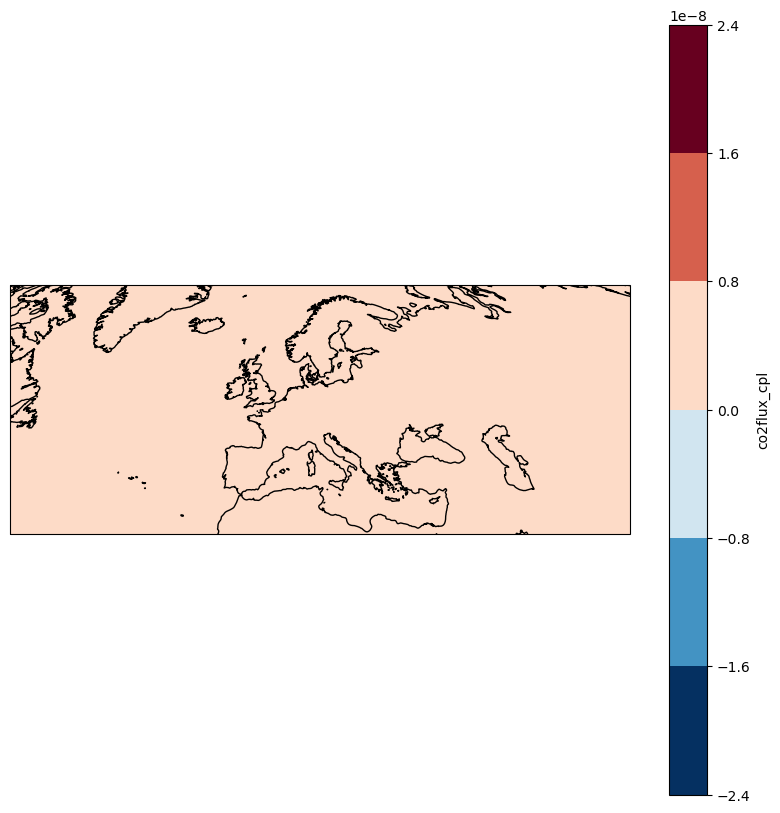

In [41]:
fig=plt.figure(figsize=(10,10), frameon=True) 

ax = plt.axes(projection=ccrs.Mollweide())
mean_array.co2flux_cpl.plot.contourf(ax=ax, transform=ccrs.PlateCarree());
ax.coastlines(); ax.set_extent([70, -50, 30, 60]) # plot a region

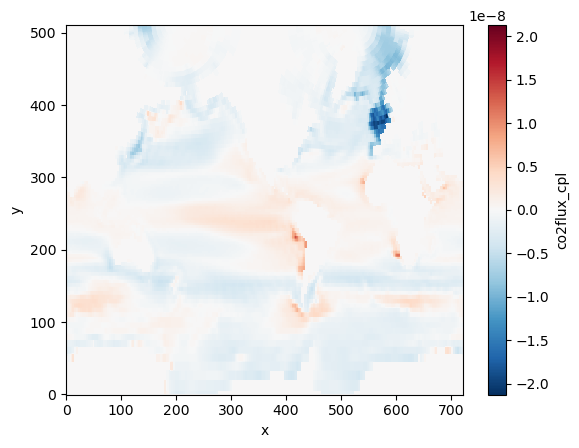

In [24]:
ds_date_range.co2flux_cpl.mean(dim=('time_counter')).plot()

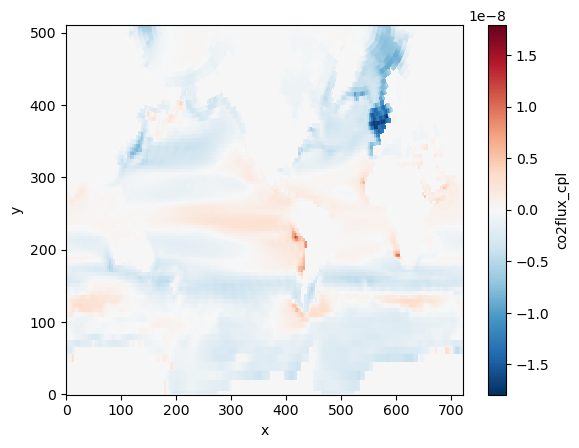

In [26]:
data.co2flux_cpl.mean(dim=('time_counter')).plot()

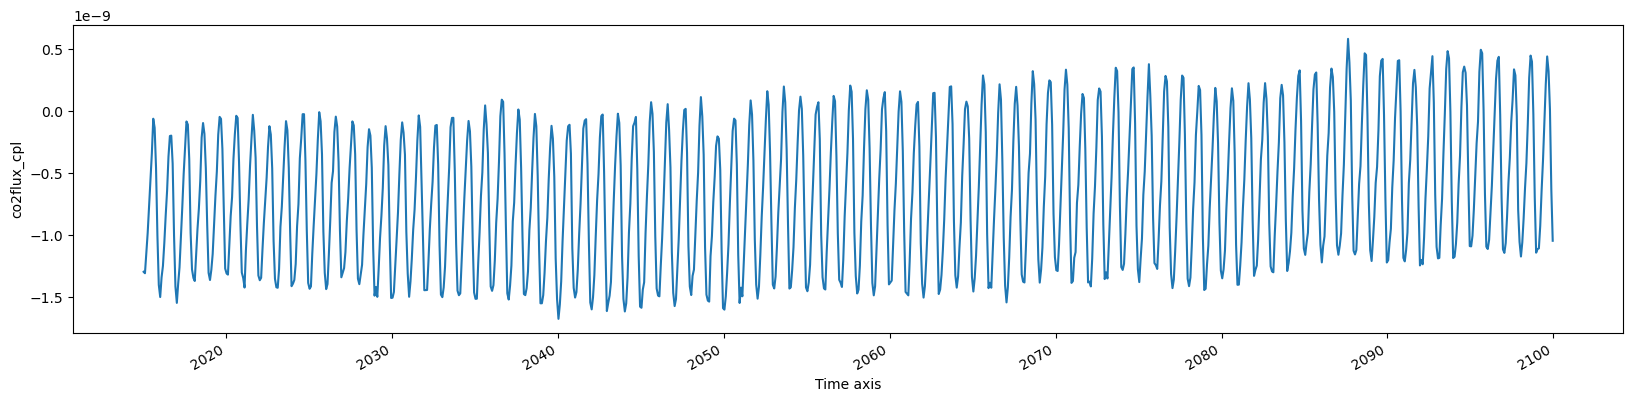

In [12]:
data.co2flux_cpl.mean(dim=('y', 'x')).plot(figsize= (20, 4)) # global mean

In [21]:
sliced_data = data.where((-40 < data.nav_lon) & (data.nav_lon < 40) & (20 < data.nav_lat) & (data.nav_lat < 80), drop=True)

# https://stackoverflow.com/questions/41818927/how-to-subset-data-using-multidimensional-coordinates-using-python-xarr

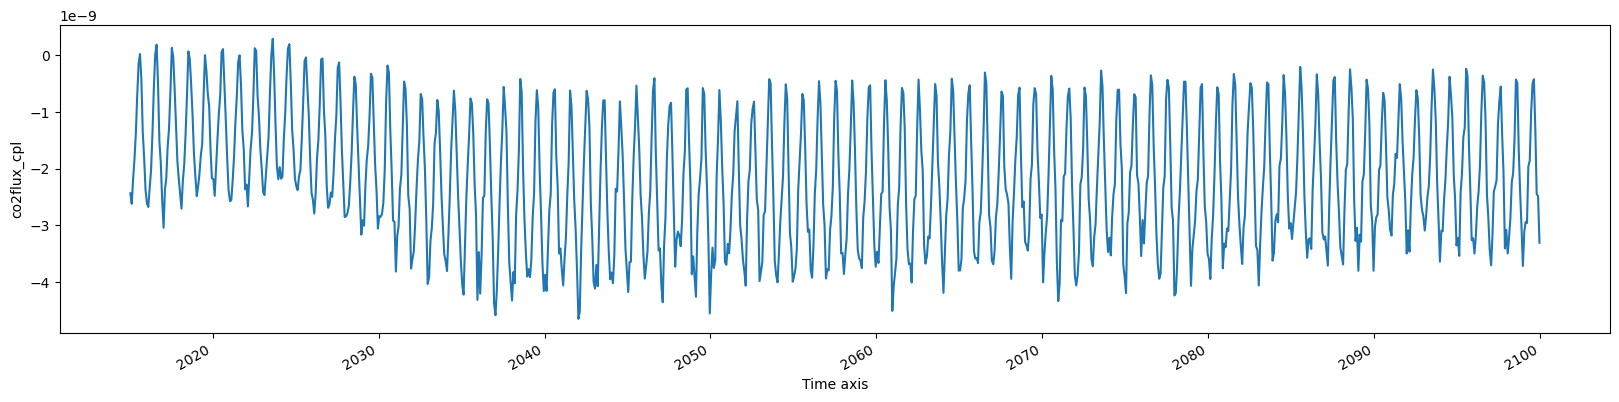

In [40]:
sliced_data.co2flux_cpl.mean(dim=('y', 'x')).plot(figsize= (20, 4)) # regional mean with OAE

In [42]:
df_sliced = sliced_data.to_dataframe() # export data as Pandas dataframe 

co2flux_cpl time_counter_bnds    nav_lat  \
time_counter        y   x   bnds                                              
2015-01-16 12:00:00 0   0   0    -6.591711e-10        2015-01-01  20.076111   
                            1    -6.591711e-10        2015-02-01  20.076111   
                        1   0    -6.591711e-10        2015-01-01  20.076111   
                            1    -6.591711e-10        2015-02-01  20.076111   
                        2   0    -6.591711e-10        2015-01-01  20.076111   
...                                        ...               ...        ...   
2099-12-16 12:00:00 195 157 1              NaN               NaT  62.351021   
                        158 0              NaN               NaT  62.141201   
                            1              NaN               NaT  62.141201   
                        159 0              NaN               NaT  61.931664   
                            1              NaN               NaT  61.931664   

                                    nav_lon  
time_counter        y   x   bnds             
2015-01-16 12:00:00 0   0   0    -39.750000  
                            1    -39.750000  
                        1   0    -39.250000  
                            1    -39.250000  
                        2   0    -38.750000  
...                                     ...  
2099-12-16 12:00:00 195 157 1     63.845455  
                        158 0     63.973076  
                            1     63.973076  
                        159 0     64.099571  
                            1     64.099571  

[63974400 rows x 4 columns]

Text(0.5, 1.02, 'CO2 flux')

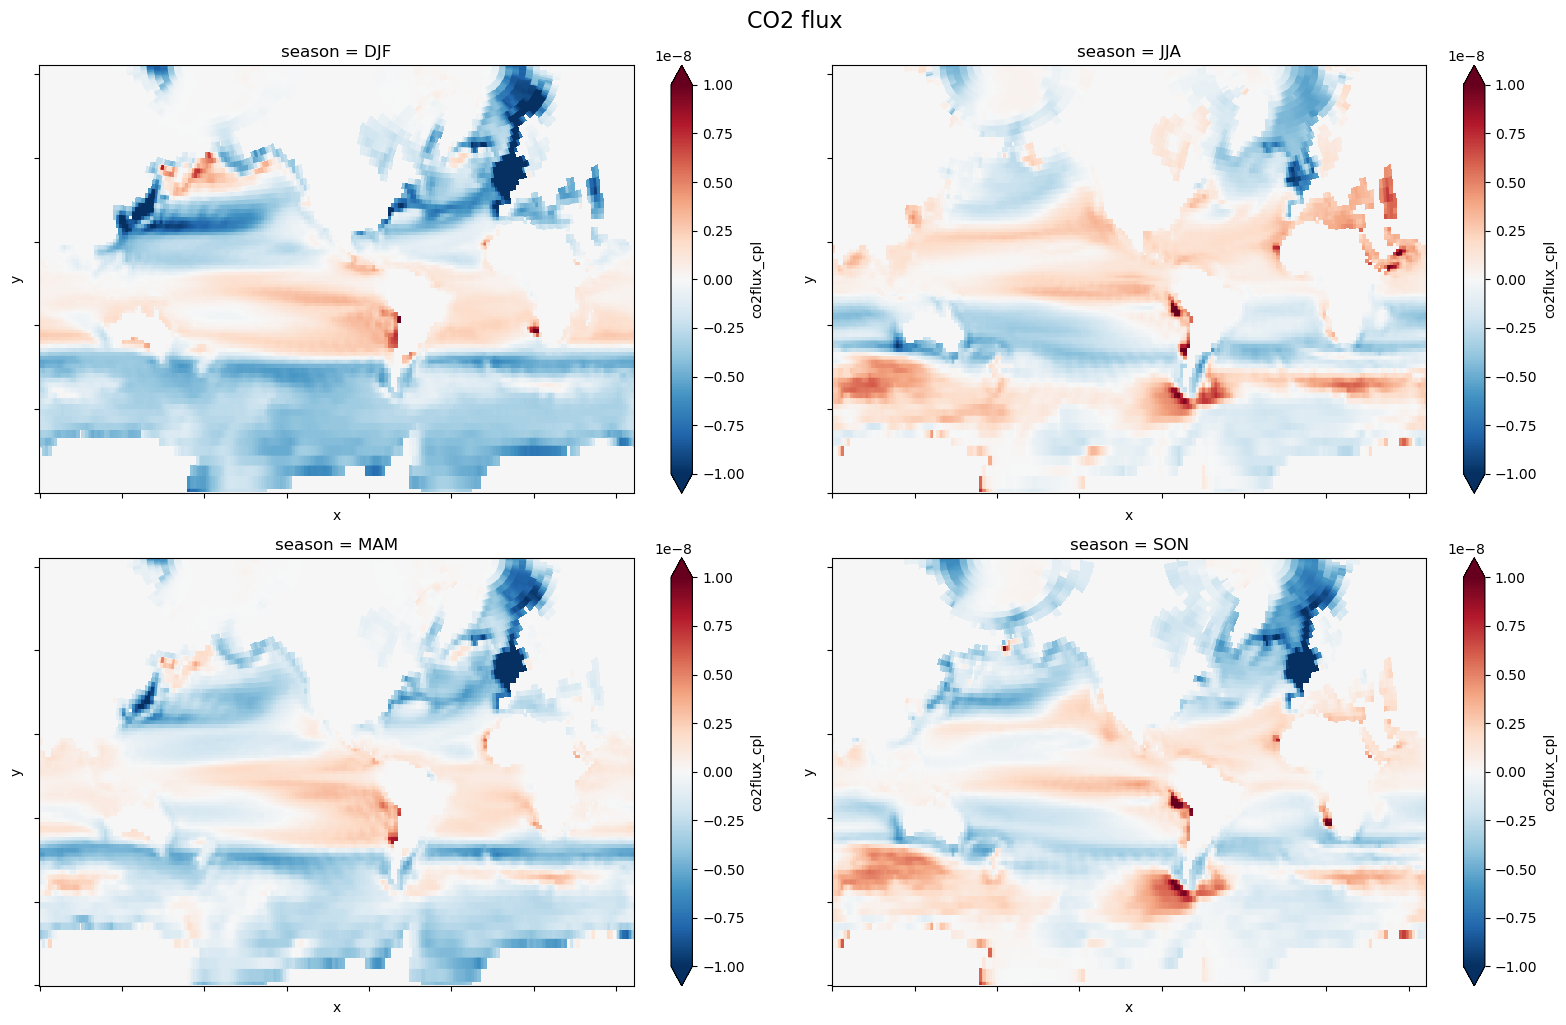

In [43]:
ds_season = data.co2flux_cpl.groupby('time_counter.season').mean('time_counter')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
i = 0
for j, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        i += 1
        j = 0
        
    elif season =='SON':
        j = 1
        
    ds_season.sel(season=season).plot.pcolormesh(
        ax=axes[j, i], vmin=-0.00000001, vmax=0.00000001, cmap='RdBu_r',
        add_colorbar=True, extend='both')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')

plt.tight_layout()
fig.suptitle('CO2 flux', fontsize=16, y=1.02)

Text(0.5, 1.02, 'CO2 flux')

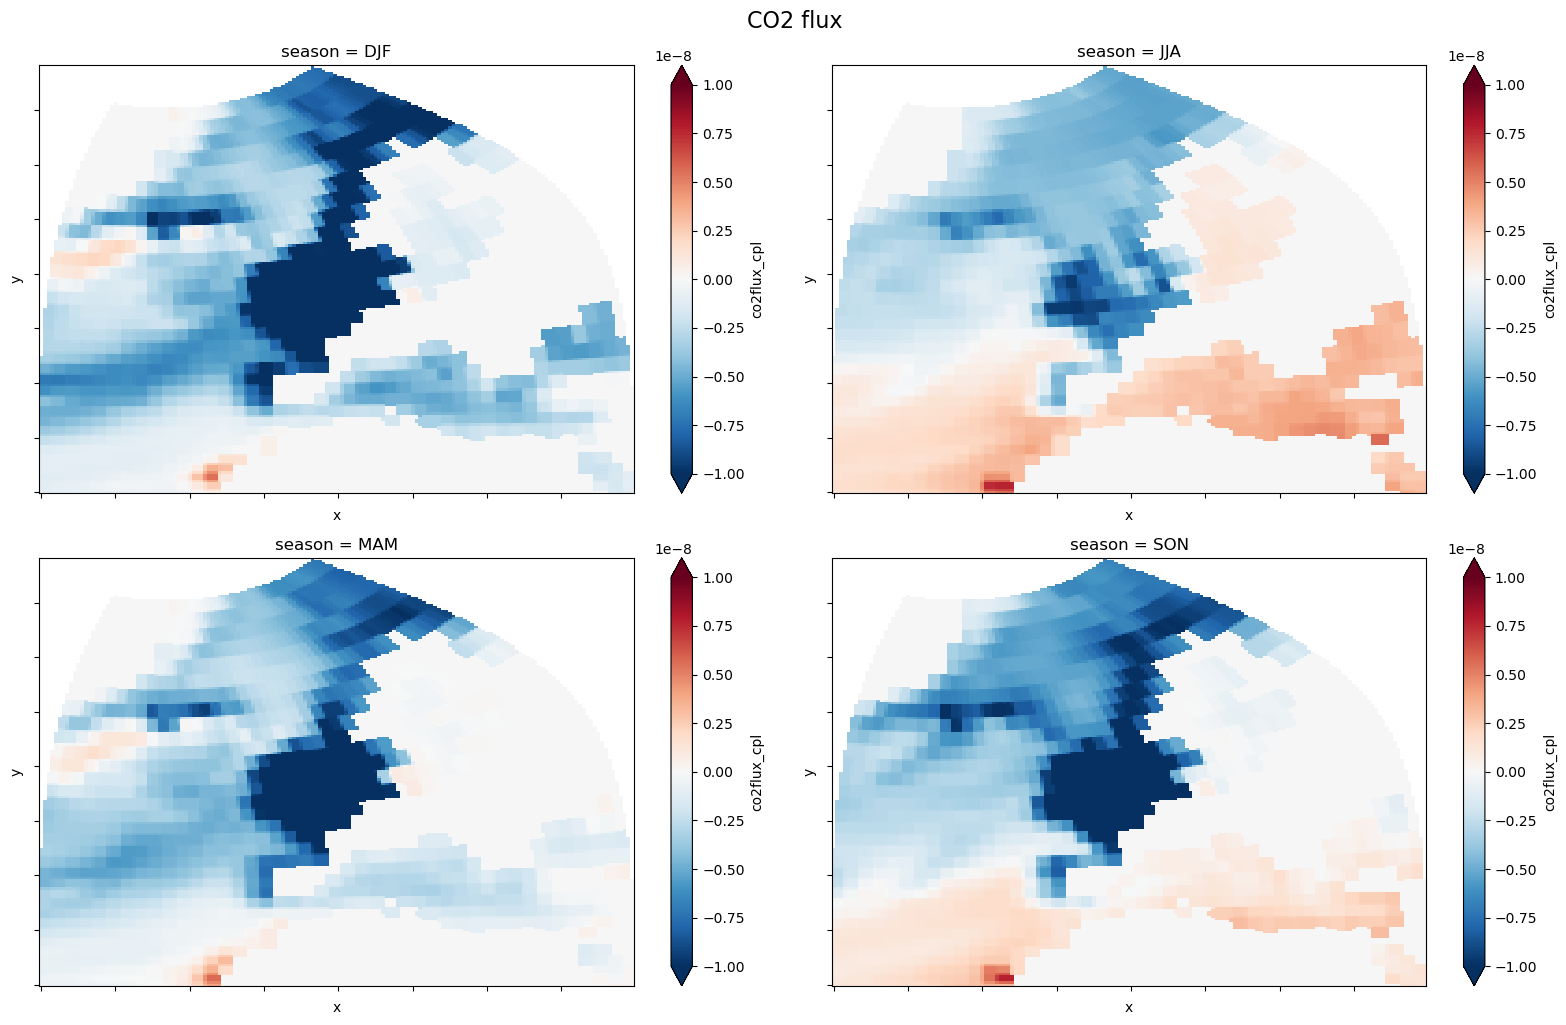

In [44]:
ds_season = sliced_data.co2flux_cpl.groupby('time_counter.season').mean('time_counter')

ds_season = sliced_data.co2flux_cpl.groupby('time_counter.season').mean('time_counter')
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
i = 0
for j, season in enumerate(('DJF', 'MAM', 'JJA', 'SON')):
    if season =='JJA':
        i += 1
        j = 0
        
    elif season =='SON':
        j = 1
        
    ds_season.sel(season=season).plot.pcolormesh(
        ax=axes[j, i], vmin=-0.00000001, vmax=0.00000001, cmap='RdBu_r',
        add_colorbar=True, extend='both')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')

plt.tight_layout()
fig.suptitle('CO2 flux', fontsize=16, y=1.02)

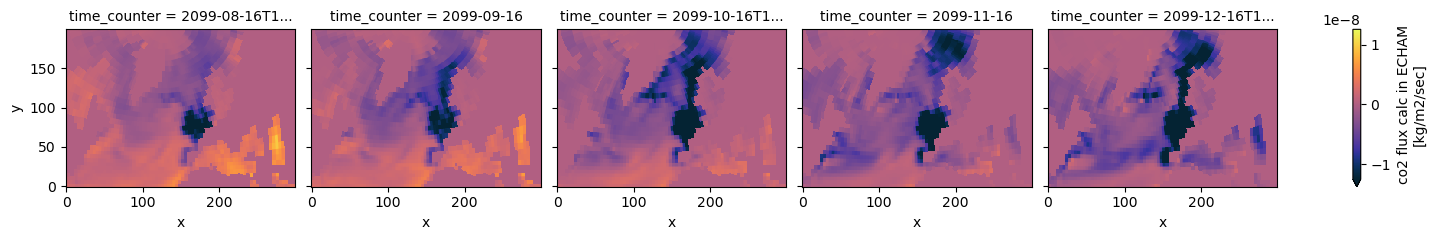

In [50]:
# last seven days of the simulation

ds = '/Users/chiaraciscato/Desktop/geomar/FOCI data/CO2flux_CDR_EU_coast_ssp126_1m.nc'

cmap = cmocean.cm.thermal
with xr.open_dataset(ds) as xadf:
    pd = xadf.isel(time_counter=slice(-5,None), y=slice(300, 500), x=slice(400, 700)) #last seven days
    facet = pd['co2flux_cpl'].plot(x='x', y='y', col='time_counter',col_wrap=5,robust=True,figsize=(16,2.5),cmap=cmap)

In [45]:
february = df.loc[(df.time_counter_bnds.dt.month==2)]

In [57]:
february.head()

co2flux_cpl    nav_lat  nav_lon  \
time_counter        y x bnds                                    
2089-01-16 12:00:00 0 0 1             0.0 -77.010475    72.75   
                      1 1             0.0 -77.010475    73.25   
                      2 1             0.0 -77.010475    73.75   
                      3 1             0.0 -77.010475    74.25   
                      4 1             0.0 -77.010475    74.75   

                             time_counter_bnds  
time_counter        y x bnds                    
2089-01-16 12:00:00 0 0 1           2089-02-01  
                      1 1           2089-02-01  
                      2 1           2089-02-01  
                      3 1           2089-02-01  
                      4 1           2089-02-01

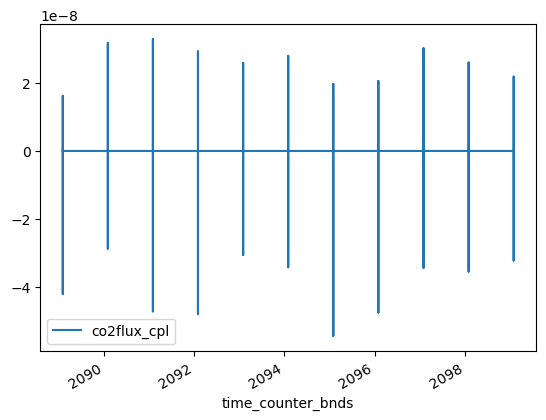

In [58]:
# gca stands for 'get current axis'
ax = plt.gca()

february.plot(kind='line',x='time_counter_bnds',y='co2flux_cpl',ax=ax)

plt.show()

In [33]:
start_date = "2020-01-01"
end_date = "2100-01-01"

co2_flux = sliced_data["co2flux_cpl"].sel(time_counter=slice(start_date, end_date))

In [34]:
co2flux_season_summary = co2_flux.groupby('time_counter.season').mean('time_counter', skipna=True)

In [35]:
co2flux_season_mean_all_years = co2_flux.resample(time_counter='QS-DEC', keep_attrs=True).mean()

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/xarray/core/common.py:1128: UserWarning: Passing ``keep_attrs`` to ``resample`` has no effect and will raise an error in xarray 0.20. Pass ``keep_attrs`` directly to the applied function, e.g. ``resample(...).mean(keep_attrs=True)``.
  "Passing ``keep_attrs`` to ``resample`` has no effect and will raise an"


In [36]:
co2flux_seasonal_mean = co2flux_season_mean_all_years.groupby('time_counter').mean(["y", "x"])

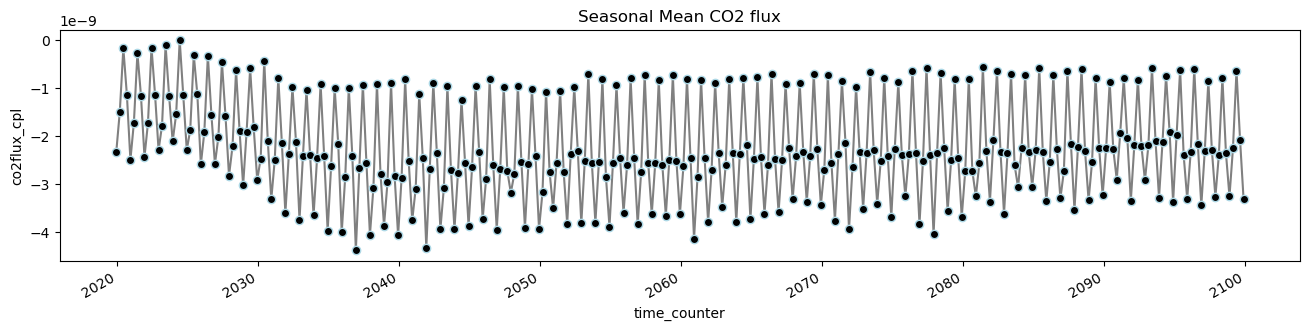

In [38]:
f, ax = plt.subplots(figsize=(16, 3))
co2flux_seasonal_mean.plot(marker="o",
                        color="grey",
                        markerfacecolor="black",
                        markeredgecolor="lightblue")
ax.set(title="Seasonal Mean CO2 flux")
plt.show()

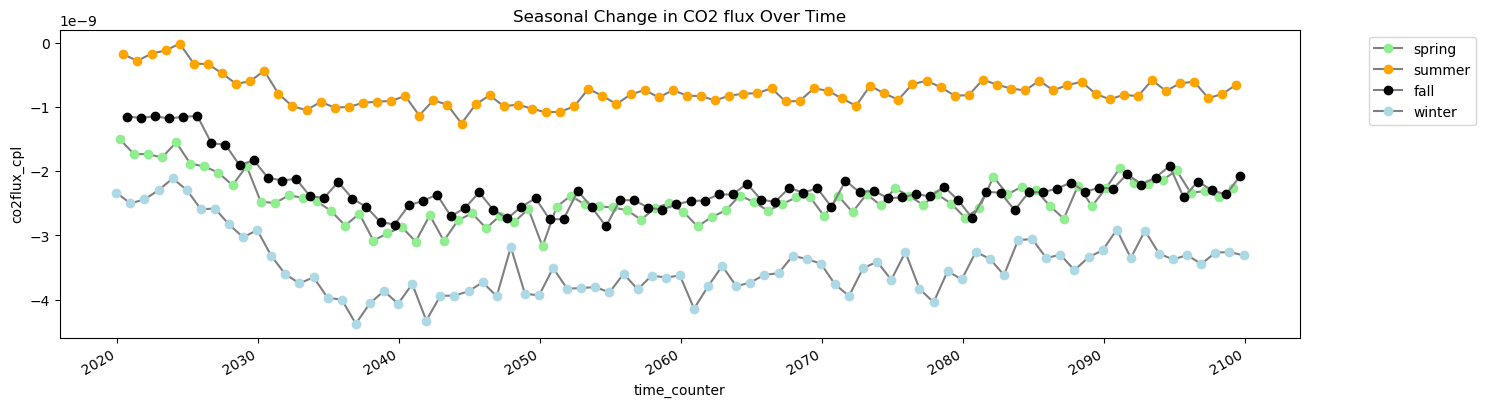

In [41]:
colors = {3: "lightgreen", 6: "orange", 9: "black", 12: "lightblue"}
seasons = {3: "spring", 6: "summer", 9: "fall", 12: "winter"}

f, ax = plt.subplots(figsize=(16, 4))
for month, arr in co2flux_seasonal_mean.groupby('time_counter.month'):
    arr.plot(ax=ax,
             color="grey",
             marker="o",
             markerfacecolor=colors[month],
             markeredgecolor=colors[month],
             label=seasons[month])

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set(title="Seasonal Change in CO2 flux Over Time")
plt.show()